# Regression - FFNN (practice)

12 Dec 2019

In [1]:
import numpy as np
import pandas as pd

# import
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight',
                        'Shucked weight','Viscera weight','Shell weight','Rings'])

# Preprocessing: replace I,M,F to 0,1,2
df['Sex'] = df['Sex'].replace(('I','M','F'),(0,1,2))
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
# Train-test split

from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

print(X.shape, y.shape)

(4177, 8) (4177,)


In [3]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=0)
X_te.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
668,1,0.550,0.425,0.155,0.9175,0.2775,0.2430,0.3350
1580,0,0.500,0.400,0.120,0.6160,0.2610,0.1430,0.1935
3784,1,0.620,0.480,0.155,1.2555,0.5270,0.3740,0.3175
463,0,0.220,0.165,0.055,0.0545,0.0215,0.0120,0.0200
2615,1,0.645,0.500,0.175,1.5105,0.6735,0.3755,0.3775


In [4]:
print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

(3341, 8) (836, 8) (3341,) (836,)


In [5]:
X_tr = X_tr.astype('float32')
X_te = X_te.astype('float32')
y_tr = y_tr.astype('float32')
y_te = y_te.astype('float32')

libraries

## procedure from session

In [6]:
import tensorflow as tf

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [8]:
model = Sequential()
input_dim = 8
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [10]:
batch_size=128
epochs=100

In [11]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

In [12]:
history = model.fit(X_tr, y_tr, 
                    epochs=epochs, 
                    verbose=1, validation_data=(X_te, y_te))

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 280us/sample - loss: 29.8994 - mae: 4.1873 - mse: 29.8994 - val_loss: 7.1837 - val_mae: 1.8583 - val_mse: 7.1837
Epoch 2/100
3341/3341 [==============================] - 1s 162us/sample - loss: 6.8134 - mae: 1.8820 - mse: 6.8134 - val_loss: 6.7750 - val_mae: 1.7554 - val_mse: 6.7750
Epoch 3/100
3341/3341 [==============================] - 1s 153us/sample - loss: 6.4649 - mae: 1.8285 - mse: 6.4649 - val_loss: 6.4043 - val_mae: 1.7451 - val_mse: 6.4043
Epoch 4/100
3341/3341 [==============================] - 0s 139us/sample - loss: 6.1602 - mae: 1.7860 - mse: 6.1602 - val_loss: 6.0986 - val_mae: 1.7502 - val_mse: 6.0986
Epoch 5/100
3341/3341 [==============================] - 0s 143us/sample - loss: 5.8638 - mae: 1.7388 - mse: 5.8638 - val_loss: 5.8742 - val_mae: 1.6811 - val_mse: 5.8742
Epoch 6/100
3341/3341 [==============================] - 0s 148us/sample - loss: 5.6342 - mae: 1

3341/3341 [==============================] - 1s 152us/sample - loss: 4.3836 - mae: 1.4946 - mse: 4.3836 - val_loss: 4.5313 - val_mae: 1.4785 - val_mse: 4.5313
Epoch 95/100
3341/3341 [==============================] - 1s 158us/sample - loss: 4.3073 - mae: 1.4808 - mse: 4.3073 - val_loss: 5.2470 - val_mae: 1.5299 - val_mse: 5.2470
Epoch 96/100
3341/3341 [==============================] - 1s 156us/sample - loss: 4.3430 - mae: 1.4864 - mse: 4.3430 - val_loss: 4.5177 - val_mae: 1.4787 - val_mse: 4.5177
Epoch 97/100
3341/3341 [==============================] - 0s 147us/sample - loss: 4.3382 - mae: 1.4852 - mse: 4.3382 - val_loss: 4.7517 - val_mae: 1.4745 - val_mse: 4.7517
Epoch 98/100
3341/3341 [==============================] - 0s 140us/sample - loss: 4.3000 - mae: 1.4729 - mse: 4.3000 - val_loss: 5.0842 - val_mae: 1.6984 - val_mse: 5.0842
Epoch 99/100
3341/3341 [==============================] - 0s 148us/sample - loss: 4.3222 - mae: 1.4858 - mse: 4.3222 - val_loss: 4.5239 - val_mae: 1.4863

In [13]:
score = model.evaluate(X_te, y_te, verbose=0)
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Test error: 4.535516875782652
Test accuracy: 1.4997241


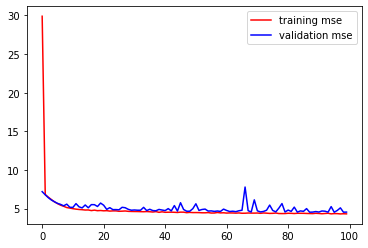

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'],'r')
plt.plot(history.history['val_mse'],'b')
plt.legend({'training mse':'r', 'validation mse': 'b'})
plt.show()

## Procedure from Tensorflow Doc

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [19]:
model = Sequential()
input_dim = 8
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [21]:
batch_size=128
epochs=100

In [22]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

In [23]:
history = model.fit(X_tr, y_tr, 
                    epochs=epochs, 
                    verbose=1, validation_split=0.2)

Train on 2672 samples, validate on 669 samples
Epoch 1/100
2672/2672 [==============================] - 1s 218us/sample - loss: 42.1983 - mae: 5.3802 - mse: 42.1983 - val_loss: 10.7737 - val_mae: 2.6241 - val_mse: 10.7737
Epoch 2/100
2672/2672 [==============================] - 0s 161us/sample - loss: 8.3137 - mae: 2.1554 - mse: 8.3137 - val_loss: 7.6599 - val_mae: 2.0393 - val_mse: 7.6599
Epoch 3/100
2672/2672 [==============================] - 0s 157us/sample - loss: 6.8923 - mae: 1.8830 - mse: 6.8923 - val_loss: 7.1297 - val_mae: 1.8942 - val_mse: 7.1297
Epoch 4/100
2672/2672 [==============================] - 0s 146us/sample - loss: 6.4916 - mae: 1.8325 - mse: 6.4916 - val_loss: 7.4876 - val_mae: 1.8016 - val_mse: 7.4876
Epoch 5/100
2672/2672 [==============================] - 0s 151us/sample - loss: 6.2861 - mae: 1.8008 - mse: 6.2861 - val_loss: 6.6277 - val_mae: 1.9465 - val_mse: 6.6277
Epoch 6/100
2672/2672 [==============================] - 0s 156us/sample - loss: 6.1493 - mae:

Epoch 95/100
2672/2672 [==============================] - 0s 138us/sample - loss: 4.3753 - mae: 1.4988 - mse: 4.3753 - val_loss: 4.6962 - val_mae: 1.5945 - val_mse: 4.6962
Epoch 96/100
2672/2672 [==============================] - 0s 154us/sample - loss: 4.3835 - mae: 1.4978 - mse: 4.3835 - val_loss: 4.6592 - val_mae: 1.5591 - val_mse: 4.6592
Epoch 97/100
2672/2672 [==============================] - 0s 139us/sample - loss: 4.3722 - mae: 1.4974 - mse: 4.3722 - val_loss: 4.6617 - val_mae: 1.5685 - val_mse: 4.6617
Epoch 98/100
2672/2672 [==============================] - 0s 146us/sample - loss: 4.3755 - mae: 1.4980 - mse: 4.3755 - val_loss: 4.8025 - val_mae: 1.5290 - val_mse: 4.8025
Epoch 99/100
2672/2672 [==============================] - 0s 143us/sample - loss: 4.3699 - mae: 1.4932 - mse: 4.3699 - val_loss: 4.7475 - val_mae: 1.5410 - val_mse: 4.7475
Epoch 100/100
2672/2672 [==============================] - 0s 140us/sample - loss: 4.3874 - mae: 1.4962 - mse: 4.3874 - val_loss: 4.9084 - v

In [24]:
score = model.evaluate(X_te, y_te, verbose=0)
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Test error: 4.883607526715292
Test accuracy: 1.484334


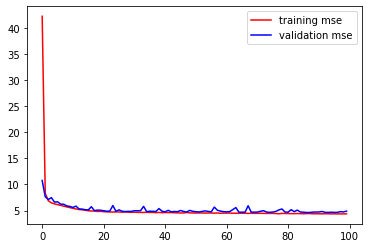

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['mse'],'r')
plt.plot(history.history['val_mse'],'b')
plt.legend({'training mse':'r', 'validation mse': 'b'})
plt.show()